### Reading data

In [50]:

with open(r'output_docTR.txt', 'r', encoding = "utf8") as file:
    data = file.readlines()

data

["[(448, 119, 559, 148, 'PREVENCION', 0.9718858003616333, 21), (553, 124, 574, 148, 'Y', 0.8856419324874878, 18), (448, 145, 581, 173, 'READAPTACION', 0.9412999153137207, 21), (448, 173, 513, 196, 'SOCIAL.', 0.7894706726074219, 17), (129, 122, 344, 172, 'SEGURIDAD', 0.9993422627449036, 37), (130, 170, 192, 193, 'SECIANIN', 0.3104821443557739, 17), (137, 179, 202, 203, 'PHDTEECION', 0.5389176607131958, 18), (186, 172, 203, 187, 'DE', 0.98406982421875, 11), (197, 179, 256, 198, 'CIUDADAA', 0.42762088775634766, 14), (200, 169, 259, 187, 'SICURIDAD', 0.41643038392066956, 13), (414, 235, 545, 263, 'SECRETARIA', 0.9940138459205627, 21), (545, 240, 582, 266, 'DE', 0.9849648475646973, 19), (579, 241, 703, 271, 'SEGURIDAD', 0.9987179040908813, 22), (700, 246, 724, 271, 'Y', 0.9930081367492676, 18), (720, 244, 857, 278, 'PROTECCION', 0.9368308186531067, 25), (854, 252, 978, 286, 'CIUDADANA', 0.9984472393989563, 25), (584, 277, 723, 311, 'PREVENCION', 0.707526445388794, 25), (721, 286, 743, 311, 

In [51]:
len(data)

3

In [52]:
# keep only coordinate elements
data.pop(1)

'\n'

In [53]:
data[0]

"[(448, 119, 559, 148, 'PREVENCION', 0.9718858003616333, 21), (553, 124, 574, 148, 'Y', 0.8856419324874878, 18), (448, 145, 581, 173, 'READAPTACION', 0.9412999153137207, 21), (448, 173, 513, 196, 'SOCIAL.', 0.7894706726074219, 17), (129, 122, 344, 172, 'SEGURIDAD', 0.9993422627449036, 37), (130, 170, 192, 193, 'SECIANIN', 0.3104821443557739, 17), (137, 179, 202, 203, 'PHDTEECION', 0.5389176607131958, 18), (186, 172, 203, 187, 'DE', 0.98406982421875, 11), (197, 179, 256, 198, 'CIUDADAA', 0.42762088775634766, 14), (200, 169, 259, 187, 'SICURIDAD', 0.41643038392066956, 13), (414, 235, 545, 263, 'SECRETARIA', 0.9940138459205627, 21), (545, 240, 582, 266, 'DE', 0.9849648475646973, 19), (579, 241, 703, 271, 'SEGURIDAD', 0.9987179040908813, 22), (700, 246, 724, 271, 'Y', 0.9930081367492676, 18), (720, 244, 857, 278, 'PROTECCION', 0.9368308186531067, 25), (854, 252, 978, 286, 'CIUDADANA', 0.9984472393989563, 25), (584, 277, 723, 311, 'PREVENCION', 0.707526445388794, 25), (721, 286, 743, 311, '

In [54]:
#convert to list format
import ast

list1 = ast.literal_eval(data[0] )
list2 = ast.literal_eval(data[1] )

In [55]:
list1[0]

(448, 119, 559, 148, 'PREVENCION', 0.9718858003616333, 21)

In [56]:
from pptx.util import Pt
from pptx import Presentation

def add_text_in_bounding_boxes(presentation, slide_index, text, coordinates):
    slide = presentation.slides[slide_index]
    left, top, width, height = coordinates
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = text
    p.font.size = Pt(10) # size 12 to keep uniformity and avoid text overlaps


In [102]:
import aspose.pydrawing as draw
import aspose.slides as slides
import matplotlib.pyplot as plt
def plot_slide(presentation, slide, show=True):

    # Instantiate a Presentation class that represents the presentation file
    with slides.Presentation(presentation) as pres:
        # Access the first slide
        sld = pres.slides[slide]

        # User defined dimension
        desiredX = 210*4
        desiredY = 297*4

        # Getting scaled value  of X and Y
        ScaleX = (1.0 / pres.slide_size.size.width) * desiredX
        ScaleY = (1.0 / pres.slide_size.size.height) * desiredY


        # Create a full scale image
        bmp = sld.get_thumbnail(ScaleX, ScaleY)

        # save the image to disk in JPEG format
        bmp.save("temp.jpg", draw.imaging.ImageFormat.jpeg)
    
        fig, ax = plt.subplots(figsize=(21/2,29.7/2))
        plt.imshow(plt.imread("temp.jpg"))
        plt.axis("off")
        if show: 
            plt.show()
        return ax

### Tests

In [8]:
prova = [448, 119, 559, 148, 'PREVENCION', 0.9718858003616333, 21]


In [22]:
presentation = Presentation("template.pptx")

coordinates = Pt(prova[0] / 2), Pt(prova[1] / 2), Pt((prova[2] - prova[0]) / 2), Pt((prova[3] - prova[1]) / 2)

add_text_in_bounding_boxes(presentation, 0, prova[4], coordinates)
presentation.save("output2.pptx")

In [15]:
# !pip install aspose.slides

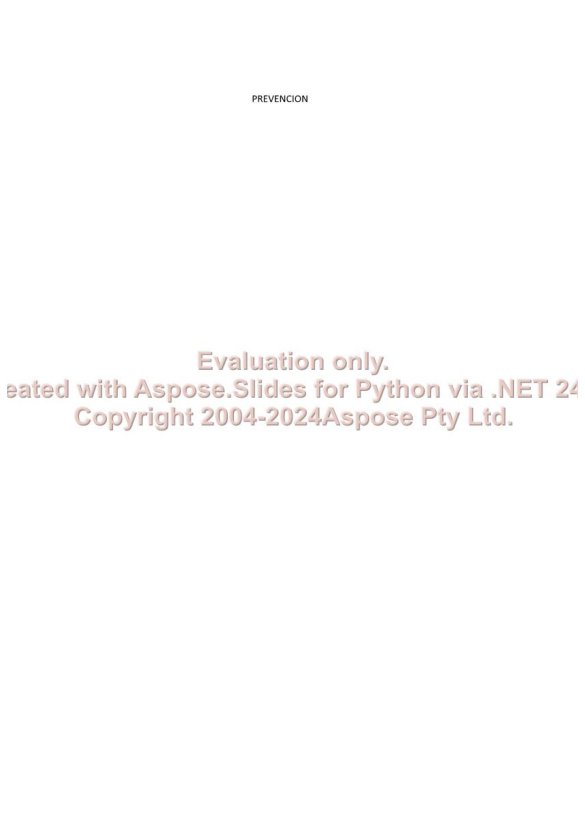

In [44]:
plot_slide("output2.pptx", 0)

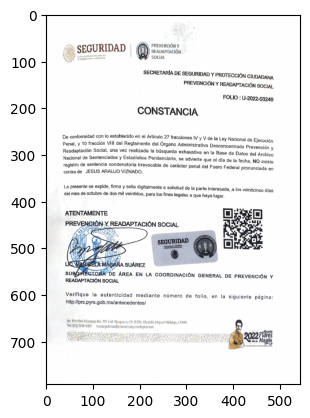

In [8]:
# open an image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(r'C:\Users\xavim\Desktop\Uni\3er\2\Syntesis\Project_Synthesis2-\Sample documents - PNG\Certificates of no criminal records\Constancia de no antecedentes penales federales\0.png')
plt.imshow(img)


In [10]:
width, height = img.size

In [44]:
presentation = Presentation("template.pptx")

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in list1:
    coordinates = Pt(words[0] / 2), Pt(words[1] / 2.1), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)
    text = words[4]
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    
presentation.save("predefined_layout.pptx")

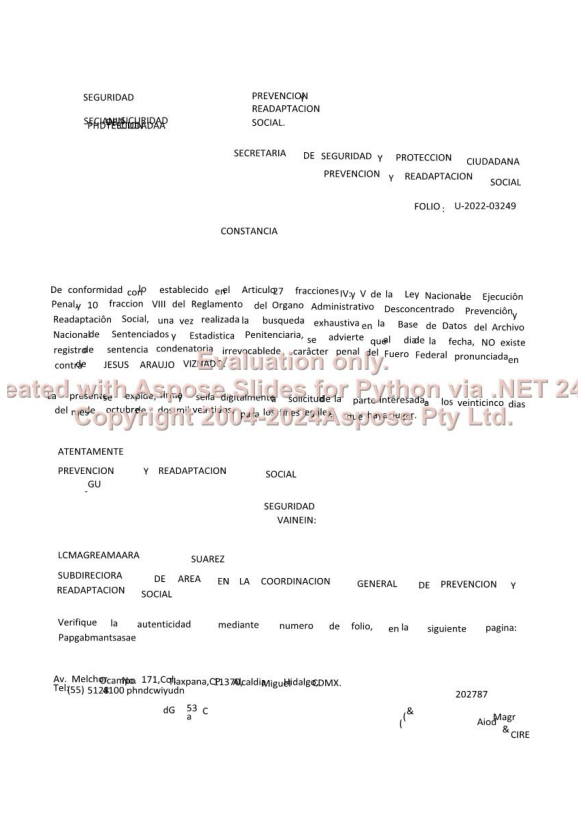

In [45]:
plot_slide("predefined_layout.pptx", 0)

In [11]:
#resizing the slide layout
presentation = Presentation("template.pptx")


pixels_per_inch = 96  # Standard resolution for screens
new_width = int(width * 914400 / pixels_per_inch)
new_height = int(height * 914400 / pixels_per_inch)

# Resize the slide layout
presentation.slide_width = new_width
presentation.slide_height = new_height

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in list1:
    coordinates = Pt(words[0] / 2.5), Pt(words[1] / 3), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)    
    text = words[4]
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    
presentation.save("with_image_layout.pptx")

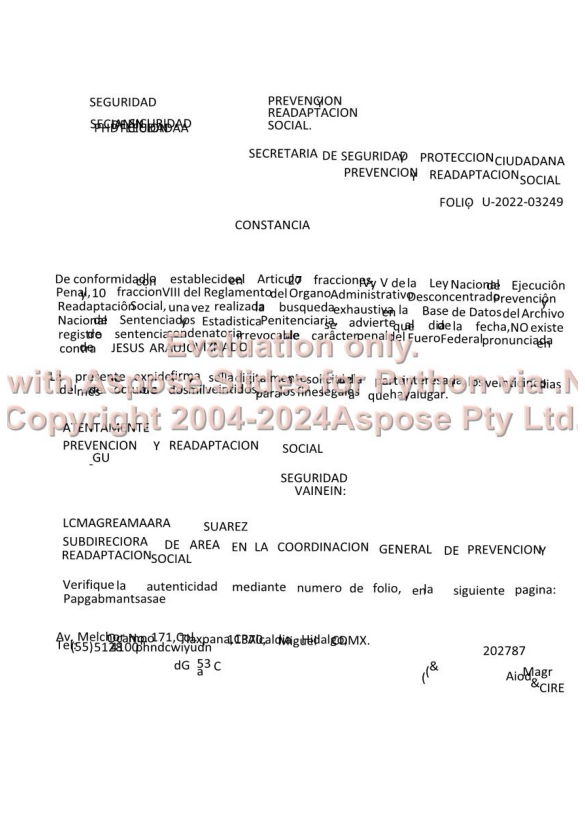

In [46]:
plot_slide("with_image_layout.pptx", 0)

In [12]:
from pptx.util import Pt
from pptx import Presentation
from pptx.dml.color import RGBColor

def add_text_in_bounding_boxes_colors(presentation, slide_index, text, coordinates, confidence):
    slide = presentation.slides[slide_index]
    left, top, width, height = coordinates
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = text
    p.font.size = Pt(10) # size 12 to keep uniformity and avoid text overlaps
    if confidence > 0.9:
        p.font.color.rgb = RGBColor(0, 255, 0)
    elif confidence > 0.6:
        p.font.color.rgb = RGBColor(255, 165, 0)
    else:
        p.font.color.rgb = RGBColor(255, 0, 0)
    

In [18]:
#resizing the slide layout
presentation = Presentation("template.pptx")


pixels_per_inch = 96  # Standard resolution for screens
new_width = int(width * 914400 / pixels_per_inch)
new_height = int(height * 914400 / pixels_per_inch)

# Resize the slide layout
presentation.slide_width = new_width
presentation.slide_height = new_height

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in list1:
    coordinates = Pt(words[0] / 2.5), Pt(words[1] / 3), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)    
    text = words[4]
    confidence = words[5]
    add_text_in_bounding_boxes_colors(presentation, 0, text, coordinates, confidence)
    
presentation.save("image_layout_confidence_words.pptx")


def change_text_color(presentation, slide_index, color):
    slide = presentation.slides[slide_index]
    for shape in slide.shapes:
        if not shape.has_text_frame:
            continue
        for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
                run.font.color.rgb = color


change_text_color(presentation, 0, RGBColor(0, 0, 0))
presentation.save("remove_colors.pptx")

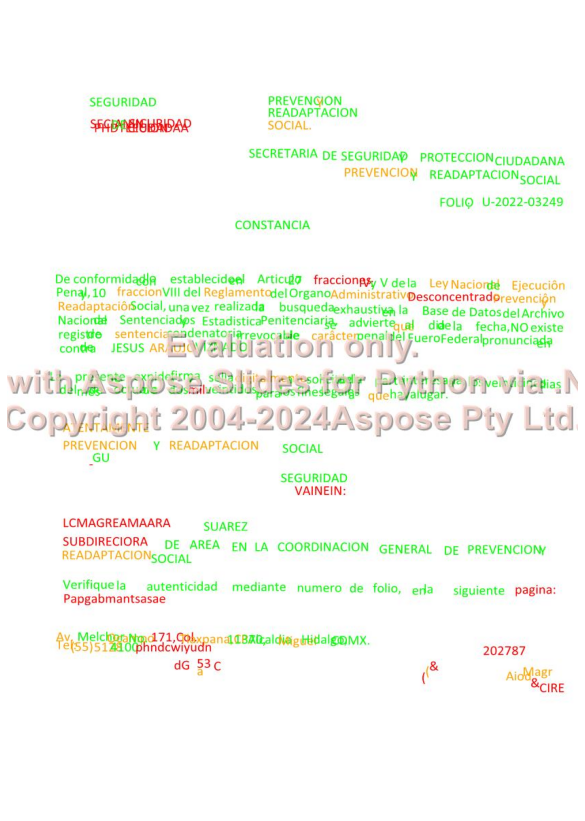

In [47]:
plot_slide("image_layout_confidence_words.pptx", 0)

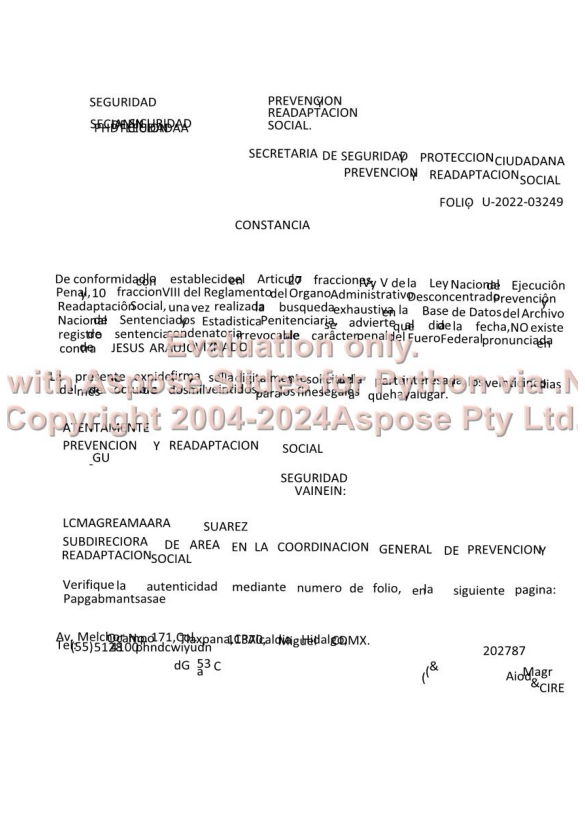

In [48]:
plot_slide("remove_colors.pptx", 0)

### Trying to cluster text from the same line

In [58]:
from pptx.util import Pt
from pptx import Presentation

In [65]:
clusters = {}

words_bounding_boxes = []
words_text = []
# mean 
for words in list1:
    words_bounding_boxes.append([Pt(words[0] / 2), Pt(words[1] / 2.1), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)])
    words_text.append(words[4])
    # print(coordinates, text)
    # print("x, y, w, h")
    
    

In [67]:
def y_distance(x, y):
    return abs(x[1]-y[1])

In [134]:
from sklearn.cluster import DBSCAN
import numpy as np

# Extract features
X = np.array(words_bounding_boxes)  # Features: x, y, width, height

# Apply DBSCAN clustering
eps = 30000 # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 2  # Minimum number of samples in a neighborhood
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric = y_distance)
labels = dbscan.fit_predict(X)

# Group words into lines based on cluster labels
lines = {}
for i, label in enumerate(labels):
    if label not in lines:
        lines[label] = []
    lines[label].append(words_text[i])

print(lines)

# # Sort words within each line by x-coordinate
# for line in lines.values():
#     line.sort(key=lambda word: words_bounding_boxes[words_text.index(word)][0])

# # Merge words into lines
# merged_lines = [' '.join(words) for words in lines.values()]

# # Print or use merged lines
# for line in merged_lines:
#     print(line)


{0: ['PREVENCION', 'Y', 'SEGURIDAD'], -1: ['READAPTACION', 'SECRETARIA', 'CIUDADANA', 'PREVENCION', 'SOCIAL', ':', 'CONSTANCIA', 'y', 'en', 'ATENTAMENTE', 'SOCIAL', '-', 'GU', 'SEGURIDAD', 'VAINEIN:', 'LCMAGREAMAARA', 'SUAREZ', 'READAPTACION', 'SOCIAL', 'SUBDIRECIORA', 'Papgabmantsasae', '&', '202787', 'CIRE'], 1: ['SOCIAL.', 'SECIANIN', 'DE', 'SICURIDAD'], 2: ['PHDTEECION', 'CIUDADAA'], 3: ['DE', 'SEGURIDAD', 'Y', 'PROTECCION'], 4: ['Y', 'READAPTACION'], 5: ['FOLIO', 'U-2022-03249'], 6: ['De', 'conformidad', 'con', 'lo', 'establecido', 'en', 'el', 'Articulo', '27', 'fracciones', 'IV:', 'y', 'V', 'de', 'la', 'Ley', 'Nacional', 'de', 'Ejecuciôn'], 7: ['Penal,', 'y', '10', 'fraccion', 'VIII', 'del', 'Reglamento', 'del', 'Organo', 'Administrativo'], 8: ['Desconcentrado', 'Prevenciôn'], 9: ['Readaptaciôn', 'Social,', 'una', 'vez', 'realizada', 'la', 'busqueda', 'exhaustiva', 'en', 'la', 'Base', 'de', 'Datos', 'del', 'Archivo'], 10: ['Nacional', 'de', 'Sentenciados', 'y', 'Estadistica', 'Pe

In [148]:
num_clusters = labels.max() - labels.min()

import seaborn
colorsMap = seaborn.color_palette("Set2", num_clusters)
colorsMap

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

C:\Users\Maria\AppData\Local\Temp\ipykernel_26372\810169359.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(centrex, centrey, "ro", color=colorsMap[label])


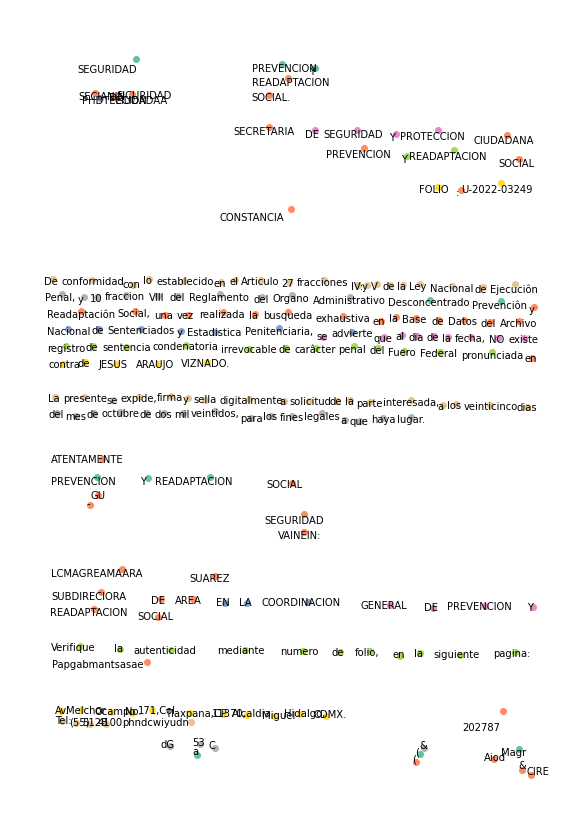

In [149]:
presentation = Presentation("template.pptx")

ax = plot_slide("clustering.pptx", 0, 0)

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words, label in zip(list1, labels):
    coordinates = Pt(words[0] / 2), Pt(words[1] / 2.1), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)
    centrex = (Pt(words[0] / 2) + Pt((words[2] - words[0]) / 4))
    centrey = (Pt(words[1] / 2) - Pt((words[3] - words[1]) / 4))
    text = words[4]
    # add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    ax.text(Pt(words[0] / 2), Pt(words[1] / 2.01), words[4])
    ax.plot(centrex, centrey, "ro", color=colorsMap[label])
    
plt.show()
# presentation.save("clustering.pptx")